In [21]:
import face_recognition
import os

img_path = os.getenv("HOME") +"/github/aiffel_practice/EXPLORATION07/images"
file_list = os.listdir(img_path)
print(file_list)

['my_img.jpg', 'bush.jpeg', 'jongmin.png', 'reagan.jpg', 'junha.png', 'my_img3.jpg', 'trump.jpg', 'jaeseok.png', 'biden.jpg', 'myoungsu.png', 'hodong.png', 'jongkook.jpg', 'my_img4.jpg', 'doni.png', 'obama.jpg', 'clinton.jpeg', 'hongcheol.png', 'my_img2.jpg']


In [42]:
def get_my_img_list(file_list):
    my_img_lst = []
    for img_name in file_list:
        if img_name.startswith("my_img"):
            my_img_lst.append(img_name)
    print(my_img_lst)
    return my_img_lst

def get_other_img_list(file_list):
    img_lst = []
    for img_name in file_list:
        if not img_name.startswith("my_img"):
            img_lst.append(img_name)
    print(img_lst)
    return img_lst

def get_img_list(file_list):
    img_lst = []
    for img_name in file_list:
        img_lst.append(img_name)
    print(img_lst)
    return img_lst

my_img_lst = get_my_img_list(file_list)
other_img_lst = get_other_img_list(file_list)
img_lst = get_img_list(file_list)

['my_img.jpg', 'my_img3.jpg', 'my_img4.jpg', 'my_img2.jpg']
['bush.jpeg', 'jongmin.png', 'reagan.jpg', 'junha.png', 'trump.jpg', 'jaeseok.png', 'biden.jpg', 'myoungsu.png', 'hodong.png', 'jongkook.jpg', 'doni.png', 'obama.jpg', 'clinton.jpeg', 'hongcheol.png']
['my_img.jpg', 'bush.jpeg', 'jongmin.png', 'reagan.jpg', 'junha.png', 'my_img3.jpg', 'trump.jpg', 'jaeseok.png', 'biden.jpg', 'myoungsu.png', 'hodong.png', 'jongkook.jpg', 'my_img4.jpg', 'doni.png', 'obama.jpg', 'clinton.jpeg', 'hongcheol.png', 'my_img2.jpg']


In [23]:
def get_cropped_face(img_file_path):
    img = face_recognition.load_image_file(img_file_path)
    face_locations = face_recognition.face_locations(img)
    top, right, bottom, left = face_locations[0]
    cropped_face = img[top:bottom, left:right, :]
    return cropped_face

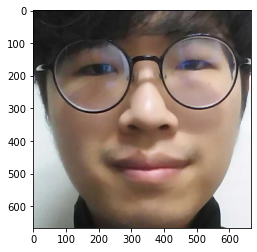

In [24]:
import matplotlib.pyplot as plt
import random

my_img_path = img_path + "/"+ random.choice(my_img_lst)
cropped_face = get_cropped_face(my_img_path)
plt.imshow(cropped_face)

In [50]:
def get_face_embeding(cropped_face):
    return face_recognition.face_encodings(cropped_face)

In [79]:
embedding = get_face_embeding(cropped_face)
print(len(embedding))
print(len(embedding[0]))
print(embedding[0][:20])
print(type(embedding[0]))

1
128
[-0.10196567  0.07996795  0.05759083 -0.02018109 -0.07439067 -0.03228232
 -0.09658205 -0.1218228   0.06859756 -0.08673687  0.30041894 -0.06423294
 -0.20728239 -0.1803859  -0.07663535  0.18902802 -0.21646735 -0.07946543
  0.01352356  0.01440175]
<class 'numpy.ndarray'>


In [85]:
def get_face_embedding_dict(dir_path, file_lst):
    embedding_dict = {}
    for file in file_lst:
        img_file_path = os.path.join(dir_path, file)
        file_name = file.split(".")[0]
        #print(img_file)
        cropped_img = get_cropped_face(img_file_path)
        embed = get_face_embeding(cropped_img)
        if len(embed) == 0: continue
        embedding_dict[file_name] = embed[0]
    return embedding_dict

In [81]:
my_embed_dict = get_face_embedding_dict(img_path, my_img_lst)

In [82]:
print(my_embed_dict.keys())
print(my_embed_dict["my_img"][:10])
print(my_embed_dict["my_img2"][:10])

dict_keys(['my_img', 'my_img3', 'my_img4', 'my_img2'])
[-0.10196567  0.07996795  0.05759083 -0.02018109 -0.07439067 -0.03228232
 -0.09658205 -0.1218228   0.06859756 -0.08673687]
[-0.07428897  0.09770338  0.04289492 -0.00786687 -0.08763178 -0.00352474
 -0.07093649 -0.1160585   0.0798023  -0.09407141]


In [83]:
import numpy as np
def get_distance(A, B, ord=2):
    return np.linalg.norm(A - B, ord=ord)
def get_distance_dict(embed_dict, name1, name2, ord=2):
    return get_distance(embed_dict[name1], embed_dict[name2], ord=ord)

In [86]:
embed_dict = get_face_embedding_dict(img_path, img_lst)
print(embed_dict.keys())
print(embed_dict["my_img"][:10])
print(embed_dict["my_img2"][:10])

dict_keys(['my_img', 'bush', 'jongmin', 'reagan', 'junha', 'my_img3', 'trump', 'jaeseok', 'biden', 'myoungsu', 'hodong', 'jongkook', 'my_img4', 'obama', 'clinton', 'hongcheol', 'my_img2'])
[-0.10196567  0.07996795  0.05759083 -0.02018109 -0.07439067 -0.03228232
 -0.09658205 -0.1218228   0.06859756 -0.08673687]
[-0.07428897  0.09770338  0.04289492 -0.00786687 -0.08763178 -0.00352474
 -0.07093649 -0.1160585   0.0798023  -0.09407141]


In [89]:
name1 = "my_img"
names = ["my_img2", "my_img3", "my_img4",
        "trump", "obama", "junha", "jaeseok","jongkook"]

for name2 in names:
    print("L2 distance between ",name1," and ",name2," : ",
          get_distance_dict(embed_dict, name1, name2))

distance between  my_img  and  my_img2  :  0.24970256877794036
distance between  my_img  and  my_img3  :  0.45775432787219766
distance between  my_img  and  my_img4  :  0.38196274949275755
distance between  my_img  and  trump  :  0.8670647249563812
distance between  my_img  and  obama  :  0.7670420710535228
distance between  my_img  and  junha  :  0.5639229328505465
distance between  my_img  and  jaeseok  :  0.458825844779992
distance between  my_img  and  jongkook  :  0.5376144280075842


In [90]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [ ]:
def get_nearest_facee(name, top=5):
    sort_key_func = get_sort_key_func("my_img")
    sort_lst = sorted(embed_dict.items(), key:lambda x: sort_key_func(x[0]))
    for 